# The Sparks Foundation GRIP September 2022


Task 1: Prediction using Supervised ML


TYPE : Linear Regration 

Author-Sachin Jadhav

# Import all libraries required for this Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import and Read the Data

In [2]:


url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
dt=pd.read_csv(url)
print("Data imported successfully")

dt.head(7)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88


In [3]:
dt.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
dt.shape

(25, 2)

In [6]:
dt.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Plotting the distribution of scores

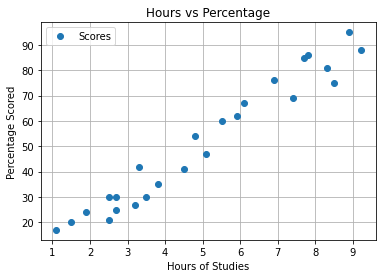

In [7]:
dt.plot(x='Hours', y='Scores', style='o', grid=True, legend=True)
plt.title("Hours vs Percentage")
plt.xlabel("Hours of Studies")
plt.ylabel("Percentage Scored")
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# Preparing the data

Here the Data is divide into inputs and outputs ("attributes" and "labels")

In [8]:
x = dt.iloc[:,:-1].values
y = dt.iloc[:,1].values

The next is to split this data into training and test sets

In [9]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size=0.2, random_state=0) 

# Training the Algorithm

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
reg = LinearRegression()
reg.fit(xtrain, ytrain)
print("Training Successfully Completed")

Training Successfully Completed


In [12]:
print("Intercept :", reg.intercept_)
print("Co-efficient :", reg.coef_)


Intercept : 2.018160041434683
Co-efficient : [9.91065648]


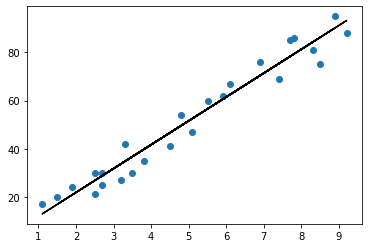

In [16]:
#Plotting the Regression Line
line = reg.coef_*x+reg.intercept_

#Plotting for the Test Data
plt.scatter(x,y)
plt.plot(x, line, color='Black')
plt.show()

# Making Predictions

In [17]:
#Test of data in hours
print(xtest)

#Predicting the scores
ypred=reg.predict(xtest)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [18]:
#Comparing Actual vs Predicted
df2=pd.DataFrame({"Actual": ytest, "Predicted": ypred})
df2.head()

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [19]:
reg.score(x, y)

0.9526947647057274

# Evaluating the model

In [20]:
from sklearn import metrics

Mean Absolute Error

In [21]:
print("Mean Absolute Error :",metrics.mean_absolute_error(ytest, ypred))


Mean Absolute Error : 4.183859899002975


Max Error

In [22]:
print("Max error :",metrics.max_error(ytest, ypred))

Max error : 6.732260779489842


Mean Squared Error

In [23]:
print("Mean Squared Error :",metrics.mean_squared_error(ytest, ypred))

Mean Squared Error : 21.5987693072174


In [24]:
hours = 9.25
value1= np.array([hours])
value1= value1.reshape(-1,1)
ownprediction = reg.predict(value1)
print("The Predicted Score for 9.25 Hours is :", format(ownprediction[0]))

The Predicted Score for 9.25 Hours is : 93.69173248737538
